In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd # type: ignore

Датасет: `minahilfatima12328/daily-coffee-transactions`

In [4]:
file_path =fr"{os.getcwd()}/datasets/Coffe_sales.csv"

df = pd.read_csv(file_path)

df.head(5)

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


#### Информация о переменных

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


#### Уникальные значения и категориальные переменные

In [9]:
categorical_columns = df.select_dtypes(include=["object"]).columns
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} уникальных значений")
    print(f"Примеры: {df[col].unique()[:5]}\n")

cash_type: 1 уникальных значений
Примеры: ['card']

coffee_name: 8 уникальных значений
Примеры: ['Latte' 'Hot Chocolate' 'Americano' 'Americano with Milk' 'Cocoa']

Time_of_Day: 3 уникальных значений
Примеры: ['Morning' 'Afternoon' 'Night']

Weekday: 7 уникальных значений
Примеры: ['Fri' 'Sat' 'Sun' 'Mon' 'Tue']

Month_name: 12 уникальных значений
Примеры: ['Mar' 'Apr' 'May' 'Jun' 'Jul']

Date: 381 уникальных значений
Примеры: ['2024-03-01' '2024-03-02' '2024-03-03' '2024-03-04' '2024-03-05']

Time: 3547 уникальных значений
Примеры: ['10:15:50.520000' '12:19:22.539000' '12:20:18.089000' '13:46:33.006000'
 '13:48:14.626000']



#### Описательная статистика для числовых переменных

In [11]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
descriptive_stats = df[numeric_columns].describe()

additional_stats = pd.DataFrame({
    "variance": df[numeric_columns].var(),
    "std_dev": df[numeric_columns].std(),
    "skewness": df[numeric_columns].skew(),
    "kurtosis": df[numeric_columns].kurtosis()
})

full_stats = pd.concat([descriptive_stats.T, additional_stats], axis=1)
full_stats

,count,mean,std,min,25%,50%,75%,max,variance,std_dev,skewness,kurtosis
hour_of_day,3547.0,14.185791,4.234010,6.00,10.00,14.00,18.00,22.0,17.926837,4.234010,0.121513,-1.126781
money,3547.0,31.645216,4.877754,18.12,27.92,32.82,35.76,38.7,23.792481,4.877754,-0.544507,-0.671208
Weekdaysort,3547.0,3.845785,1.971501,1.00,2.00,4.00,6.00,7.0,3.886815,1.971501,0.082132,-1.224040
Monthsort,3547.0,6.453905,3.500754,1.00,3.00,7.00,10.00,12.0,12.255277,3.500754,0.004314,-1.383442


#### Визуализация данных

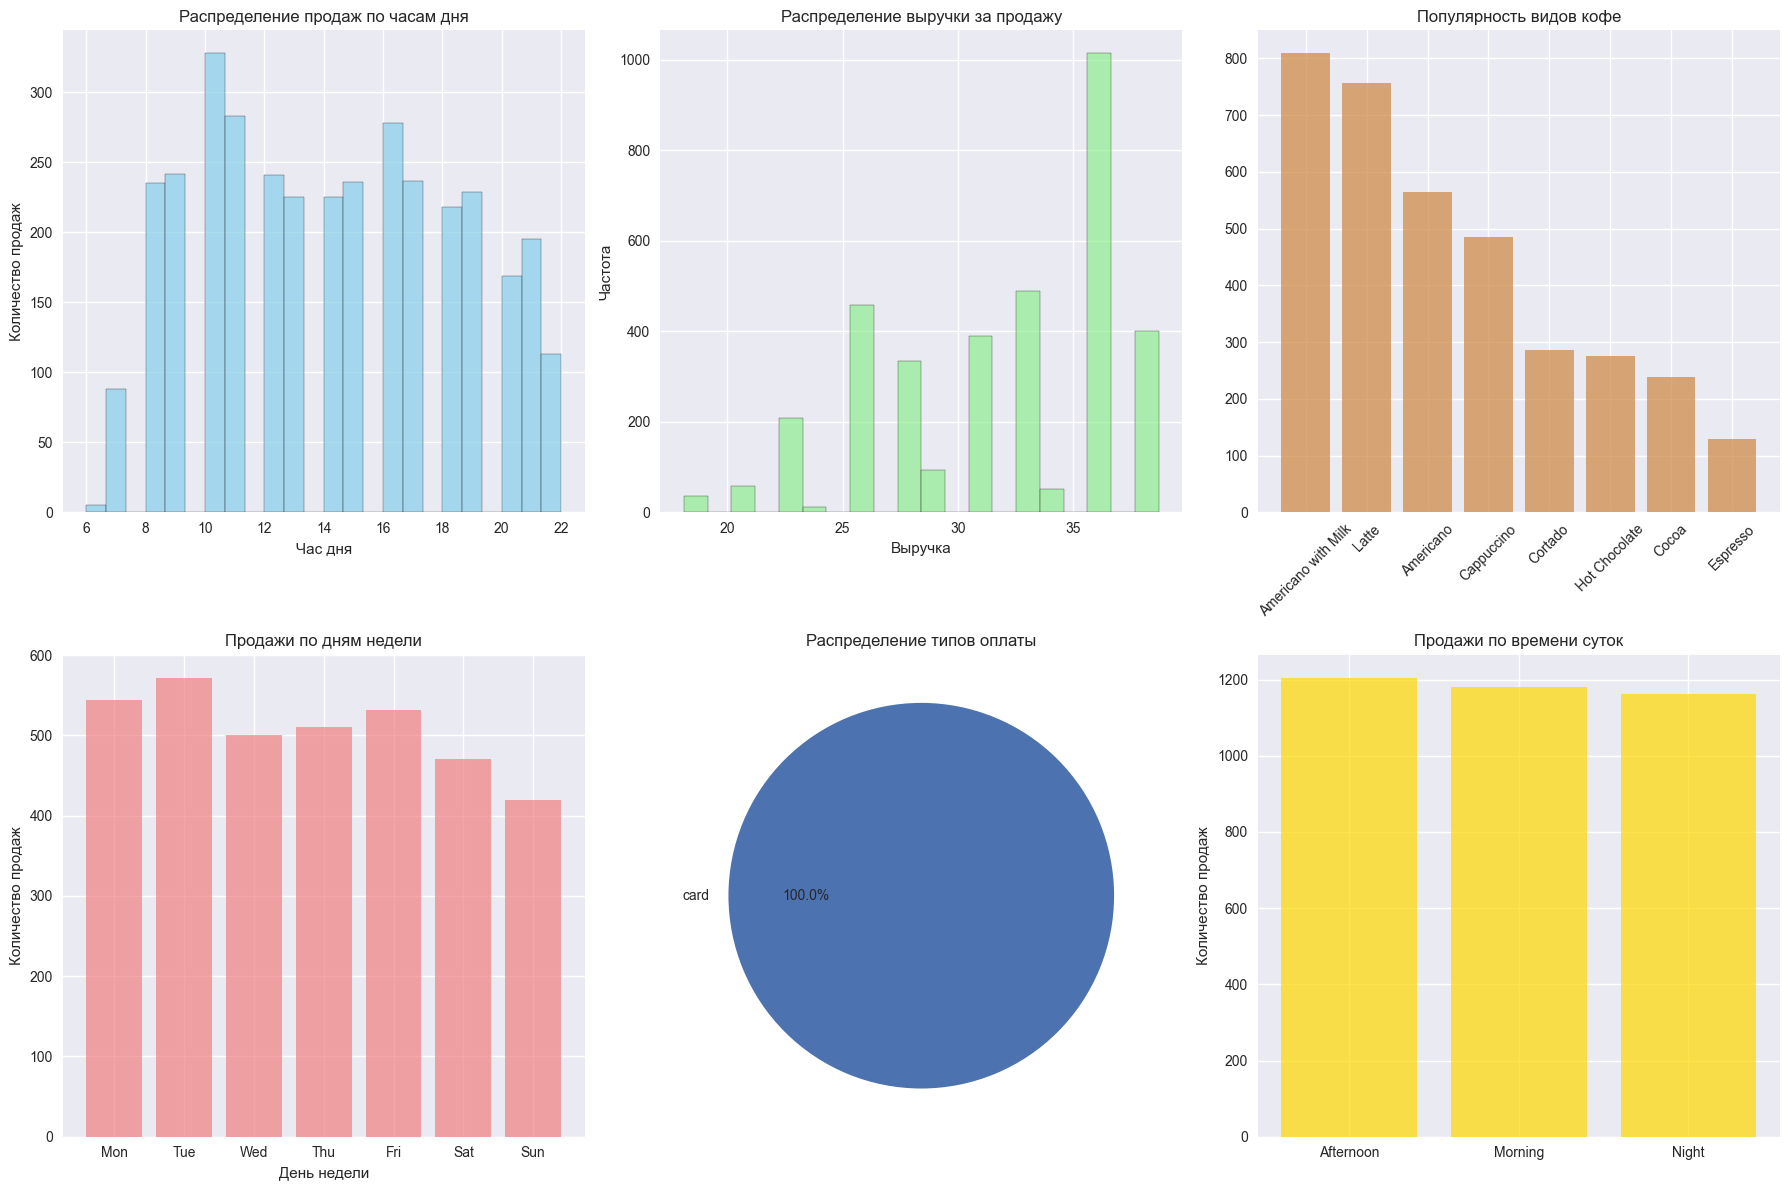

In [13]:
# Настройка стиля графиков
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Распределение продаж по часам
axes[0,0].hist(df['hour_of_day'], bins=24, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Распределение продаж по часам дня')
axes[0,0].set_xlabel('Час дня')
axes[0,0].set_ylabel('Количество продаж')

# 2. Распределение выручки
axes[0,1].hist(df['money'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_title('Распределение выручки за продажу')
axes[0,1].set_xlabel('Выручка')
axes[0,1].set_ylabel('Частота')

# 3. Популярность видов кофе
coffee_counts = df['coffee_name'].value_counts()
axes[0,2].bar(coffee_counts.index, coffee_counts.values, color='peru', alpha=0.7)
axes[0,2].set_title('Популярность видов кофе')
axes[0,2].tick_params(axis='x', rotation=45)

# 4. Продажи по дням недели
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_counts = df['Weekday'].value_counts().reindex(weekday_order)
axes[1,0].bar(weekday_counts.index, weekday_counts.values, color='lightcoral', alpha=0.7)
axes[1,0].set_title('Продажи по дням недели')
axes[1,0].set_xlabel('День недели')
axes[1,0].set_ylabel('Количество продаж')

# 5. Типы оплаты
payment_counts = df['cash_type'].value_counts()
axes[1,1].pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%')
axes[1,1].set_title('Распределение типов оплаты')

# 6. Продажи по времени суток
time_of_day_counts = df['Time_of_Day'].value_counts()
axes[1,2].bar(time_of_day_counts.index, time_of_day_counts.values, color='gold', alpha=0.7)
axes[1,2].set_title('Продажи по времени суток')
axes[1,2].set_ylabel('Количество продаж')

plt.tight_layout()
plt.show()

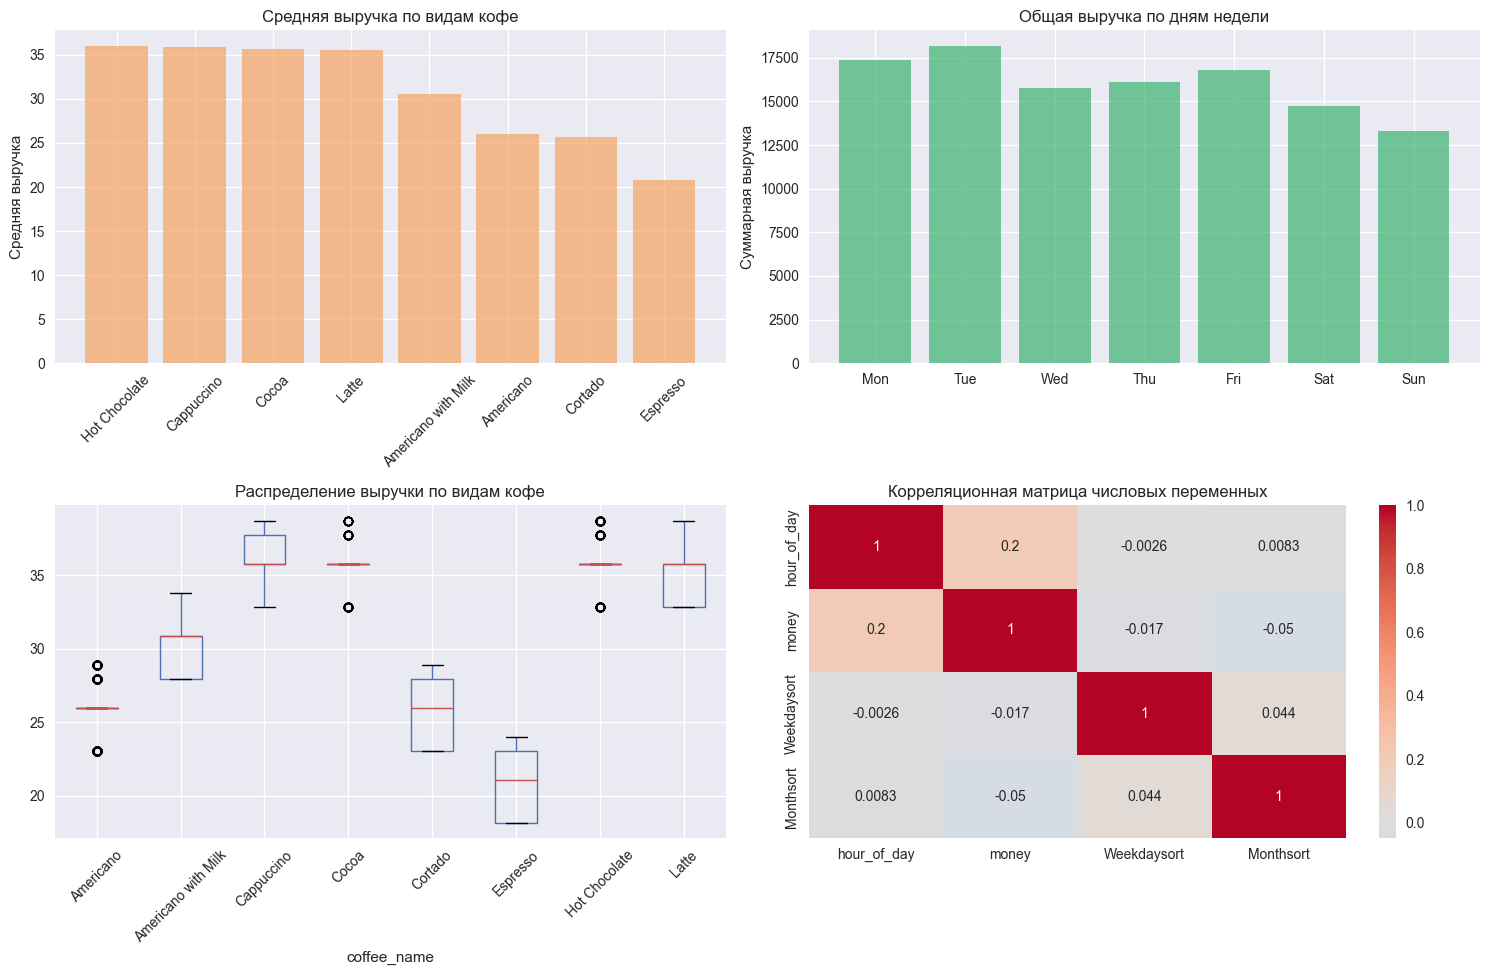

In [16]:
# Дополнительные визуализации
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 7. Средняя выручка по видам кофе
coffee_revenue = df.groupby('coffee_name')['money'].mean().sort_values(ascending=False)
axes[0,0].bar(coffee_revenue.index, coffee_revenue.values, color='sandybrown', alpha=0.7)
axes[0,0].set_title('Средняя выручка по видам кофе')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].set_ylabel('Средняя выручка')

# 8. Выручка по дням недели
weekday_revenue = df.groupby('Weekday')['money'].sum().reindex(weekday_order)
axes[0,1].bar(weekday_revenue.index, weekday_revenue.values, color='mediumseagreen', alpha=0.7)
axes[0,1].set_title('Общая выручка по дням недели')
axes[0,1].set_ylabel('Суммарная выручка')

# 9. Ящик с усами для выручки по типам кофе
df.boxplot(column='money', by='coffee_name', ax=axes[1,0])
axes[1,0].set_title('Распределение выручки по видам кофе')
axes[1,0].tick_params(axis='x', rotation=45)

# 10. Тепловая карта корреляций
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1,1])
axes[1,1].set_title('Корреляционная матрица числовых переменных')

plt.suptitle('')
plt.tight_layout()
plt.show()

### **Исследовательские вопросы и тестирование гипотез**

#### **Гипотеза 1**: Разница в продажах между утром и послеобеденным временем.
**Вопрос**: Отличается ли средняя выручка от продаж утром и после обеда?

H₀: Средняя выручка не отличается между утром и после обеда (μ_morning = μ_afternoon)</br>
H₁: Средняя выручка отличается между утром и после обеда (μ_morning ≠ μ_afternoon)

In [ ]:
morning_sales = df[df["Time_of_Day"] == "Morning"]["money"]
afternoon_sales = df[df["Time_of_Day"] == "Afternoon"]["money"]

# T-тест
t_stat, p_value = stats.ttest_ind(morning_sales, afternoon_sales, equal_var=False)

print("T-тест для независимых выборок:")
print(f"t-статистика = {t_stat:.4f}")
print(f"p-value = {p_value:.4f}")

T-тест для независимых выборок:
t-статистика = -6.0414
p-value = 0.0000


In [23]:
if p_value < 0.05:
    print("ВЫВОД: Отвергаем нулевую гипотезу. Существует статистически значимая разница в средней выручке между временами суток.")
else:
    print("ВЫВОД: Не отвергаем нулевую гипотезу. Нет статистически значимых различий в средней выручке между временами суток.")

print(f"Средняя выручка (утро): {morning_sales.mean():.2f}")
print(f"Средняя выручка (после обеда): {afternoon_sales.mean():.2f}")
print("-" * 80)

ВЫВОД: Отвергаем нулевую гипотезу. Существует статистически значимая разница в средней выручке между временами суток.
Средняя выручка (утро): 30.42
Средняя выручка (после обеда): 31.64
--------------------------------------------------------------------------------


#### **Гипотеза 2**: Зависимость между днем недели и объемом продаж
**Вопрос**: Зависит ли количество продаж от дня недели?

H₀: Количество продаж равномерно распределено по дням недели</br>
H₁: Количество продаж неравномерно распределено по дням недели

In [24]:
# Подсчет продаж по дням недели
sales_by_weekday = df['Weekday'].value_counts().reindex(weekday_order)

# Тест хи-квадрат на равномерное распределение
chi2_stat, p_value = stats.chisquare(sales_by_weekday)

print("Тест хи-квадрат на равномерное распределение:")
print(f"χ²-статистика = {chi2_stat:.4f}")
print(f"p-value = {p_value:.4f}")

if p_value < 0.05:
    print("ВЫВОД: Отвергаем нулевую гипотезу. Распределение продаж по дням недели неравномерно.")
else:
    print("ВЫВОД: Не отвергаем нулевую гипотезу. Распределение продаж по дням недели равномерно.")

print("\nКоличество продаж по дням недели:")
for day, count in sales_by_weekday.items():
    print(f"{day}: {count} продаж")
print("-" * 80)

Тест хи-квадрат на равномерное распределение:
χ²-статистика = 30.3710
p-value = 0.0000
ВЫВОД: Отвергаем нулевую гипотезу. Распределение продаж по дням недели неравномерно.

Количество продаж по дням недели:
Mon: 544 продаж
Tue: 572 продаж
Wed: 500 продаж
Thu: 510 продаж
Fri: 532 продаж
Sat: 470 продаж
Sun: 419 продаж
--------------------------------------------------------------------------------


#### **Гипотеза 3**: Разница в цене между разными видами кофе
**Вопрос**: Отличается ли средняя цена у разных видов кофе?

H₀: Средние цены всех видов кофе равны</br>
H₁: По крайней мере один вид кофе имеет среднюю цену, отличную от других


In [30]:
# ANOVA тест
coffee_groups = [group['money'].values for name, group in df.groupby('coffee_name')]
f_stat, p_value = stats.f_oneway(*coffee_groups)

print("Однофакторный ANOVA тест:")
print(f"F-статистика = {f_stat:.4f}")
print(f"p-value = {p_value:.4f}")

if p_value < 0.05:
    print("ВЫВОД: Отвергаем нулевую гипотезу. Существуют статистически значимые различия в средних ценах между видами кофе.")
    
    # Пост-хок тест Тьюки для определения каких именно групп отличаются
    coffee_data = pd.DataFrame({
        'values': df['money'],
        'groups': df['coffee_name']
    })
    tukey = pairwise_tukeyhsd(coffee_data['values'], coffee_data['groups'], alpha=0.05)
    print("\nРезультаты пост-хок теста Тьюки:")
    print(tukey)
else:
    print("ВЫВОД: Не отвергаем нулевую гипотезу. Нет статистически значимых различий в средних ценах между видами кофе.")

print("-" * 80)

Однофакторный ANOVA тест:
F-статистика = 3287.1024
p-value = 0.0000
ВЫВОД: Отвергаем нулевую гипотезу. Существуют статистически значимые различия в средних ценах между видами кофе.

Результаты пост-хок теста Тьюки:
              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1              group2       meandiff p-adj   lower    upper   reject
--------------------------------------------------------------------------------
          Americano Americano with Milk   4.6191    0.0   4.3225   4.9156   True
          Americano          Cappuccino   9.9074    0.0   9.5728   10.242   True
          Americano               Cocoa   9.6778    0.0   9.2605   10.095   True
          Americano             Cortado  -0.2444 0.5572  -0.6364   0.1476  False
          Americano            Espresso  -5.1208    0.0  -5.6484  -4.5931   True
          Americano       Hot Chocolate  10.0152    0.0    9.618  10.4123   True
          Americano               Latte   9.5267    0.0 